Implementation of Complaints classifier using Python :

Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

Dataset : We are using consumer complaints dataset from kaggle, reading it using pandas library.

In [2]:
# Load the dataset
df = pd.read_csv('consumer_complaints.csv')

In [3]:
df.head()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [4]:
# Remove missing values
df.dropna(subset=['narrative'], inplace=True)

In [5]:
df.head()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


Visualization of the Dataset :

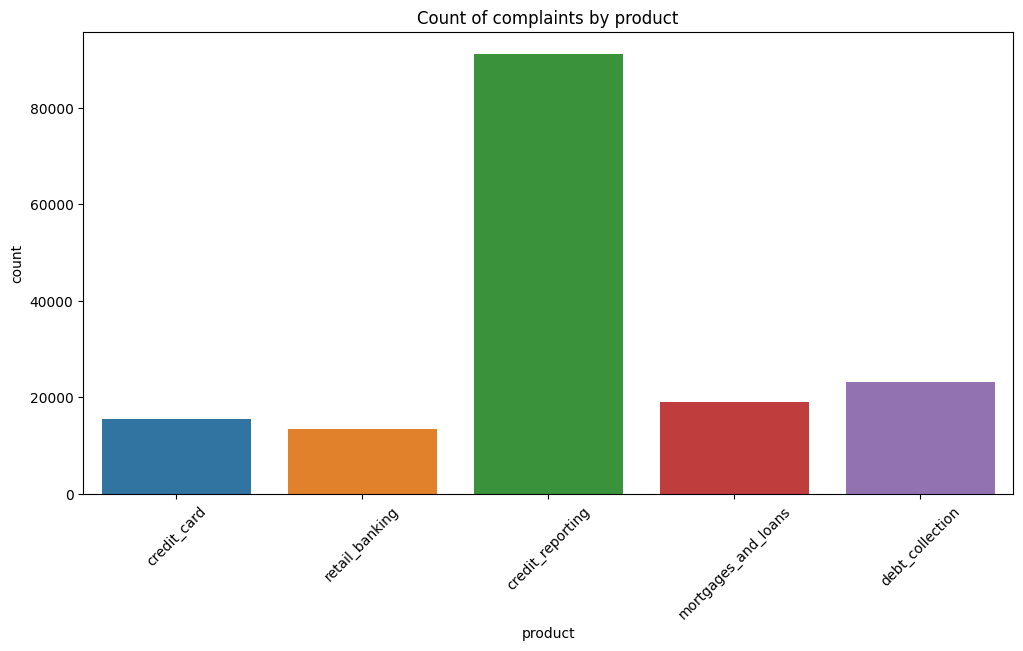

In [10]:
# Plot the count of complaints by product
plt.figure(figsize=(12,6))
sns.countplot(x='product', data=df)
plt.xticks(rotation=45)
plt.title('Count of complaints by product')
plt.show()

Split the Dataset into training and testing sets :

In [11]:
# Define the target variable
target = 'product'

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['narrative'], 
                                                    df[target], 
                                                    test_size=0.2, 
                                                    random_state=42)

Predictive Model : Using LogisticRegression to predict, set the iteration to 1000 to avoid error.

In [15]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Logistic Regression classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_vec, y_train)


LogisticRegression(max_iter=1000)

Scoring Accuracy :

In [16]:
# Evaluate the classifier on the testing set
y_pred = clf.predict(X_test_vec)
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc}")
print("Confusion matrix:\n", conf_matrix)


Accuracy: 0.8729181417972478
Confusion matrix:
 [[ 2417   381    66    48   220]
 [  273 17129   555   287    39]
 [  109   994  3324   153    35]
 [   72   418   106  3112    62]
 [  176    71    22    41  2373]]


Visualization of the Distribution of complaint types :

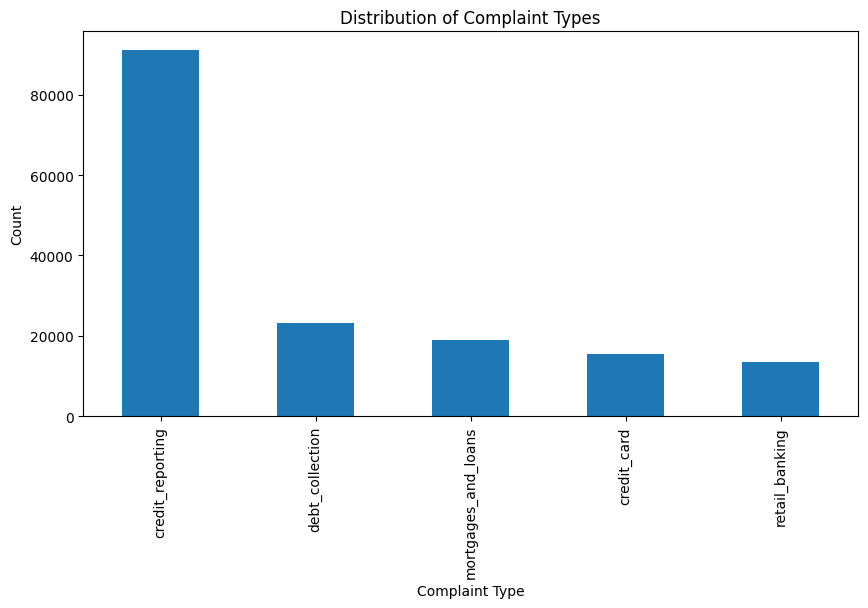

In [17]:
# Visualize the distribution of complaint types in the dataset
plt.figure(figsize=(10,5))
df['product'].value_counts().plot(kind='bar')
plt.title('Distribution of Complaint Types')
plt.xlabel('Complaint Type')
plt.ylabel('Count')
plt.show()